In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\yunus\Downloads\cereal.csv')

df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [15]:
print(df.isnull().sum())

name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        0
sugars       0
potass       0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
full name    0
dtype: int64


In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


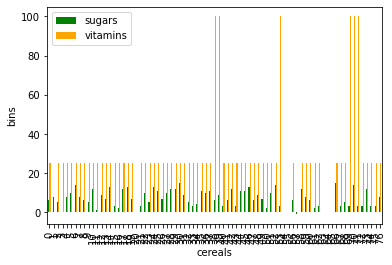

In [16]:
df[['sugars','vitamins']].plot(kind='bar',color=['green','orange'])
plt.xlabel('cereals')
plt.ylabel('bins')
plt.show()


In [63]:
conditions = [(df['mfr'] == 'N'),
    (df['mfr'] == 'Q'), (df['mfr'] == 'K'),
    (df['mfr'] == 'R'), (df['mfr'] == 'G'), (df['mfr'] == 'P'),
    (df['mfr'] == 'A')]
choices = ['Nabisco','Qualer Oats','Kellogs','Raslston Purina','General Mills','Post','American Home Foods Products']
df['full name'] = np.select(conditions,choices, default=0)
print(df)       

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

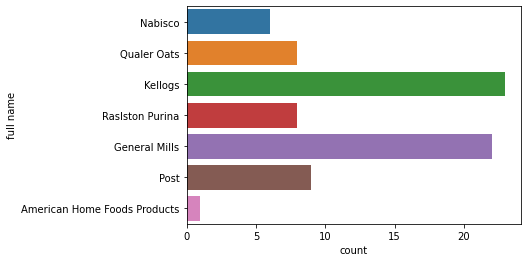

In [61]:
sns.countplot(y='full name', data = df)
plt.show()

In [29]:
y = df['rating']
x = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
x.shape, y.shape

((77, 12), (77,))

In [40]:
mod = sm.OLS(y, x)
res = mod.fit()

print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              390.8
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                    1.13e-55
Time:                        13:57:24   Log-Likelihood:                         -236.92
No. Observations:                  77   AIC:                                      497.8
Df Residuals:                      65   BIC:                                      526.0
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

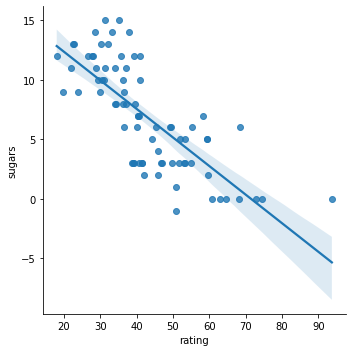

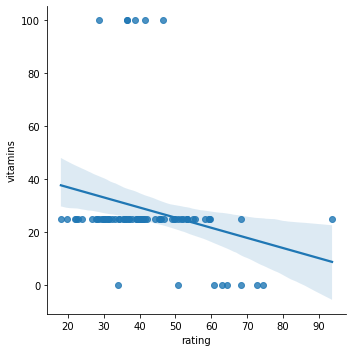

In [50]:
sns.lmplot(x='rating', y='sugars', data = df)
sns.lmplot(x='rating', y='vitamins', data = df)

In [24]:
corr = df.corr(method='pearson')
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159
